In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers, metrics

In [2]:
# Aufgabe 2a: Schwellwertneuronen sind nicht geeignet, da für das Gradientenverfahren differenzierbare Transferfunktionen nötig sind

# Initialisierung der Input-Daten
n = 3
X = [[1],[-1]]
for i in range(1,n):
    X = [x + [1] for x in X] + [x + [-1] for x in X]
data = np.array([[x,y] for x in X for y in X])

# Berechnung der Lehrer Daten
T = np.zeros(data.shape[0], dtype = int)
for i in range(data.shape[0]):
    sum = 0
    for j in range(n):
        if data[i][0][j] == 1 and data[i][1][j] == 1:
            sum = sum + 1
    T[i] = sum % 2
    
# hab's nicht hinbekommen mit data.shape = (_,2,n) also reshape zu (_,2*n)
data = np.reshape(data,(data.shape[0],2*n))

In [3]:
def train_network(n_hidden):
    '''
    Trains a neural network and returns the lowest error.
    :param n_hidden: Number of hidden neurons to use per
    layer (as vector to indicate when multiple hidden
    layers should be used). For example, [2] uses one
    hidden layer with two neurons and [2, 2] uses two
    hidden layers each with two neurons.
    :return: The lowest error (MSE) occurred over all
    training epochs.
    '''
    # Start fresh and at least try to get reproducible results

    tf.reset_default_graph()
    K.clear_session()
    tf.set_random_seed(42)
    np.random.seed(42)
    
    random_weights = tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05)
    model = tf.keras.models.Sequential()
    
    # add first hidden layer, which needs input shape as argument
    model.add(Dense(n_hidden[0], input_shape = (2*n,), activation='tanh', kernel_initializer=random_weights, bias_initializer=random_weights))
    for k in n_hidden[1:]:
        model.add(Dense(k, activation='tanh',kernel_initializer=random_weights, bias_initializer=random_weights))
   
    # add output Layer
    model.add(Dense(1,activation = 'tanh'))
    
    sgd = optimizers.SGD(lr=0.2, decay=0.0001, momentum=0.9, nesterov=True)
    
    model.compile(optimizer=sgd , loss='mse')
    his = model.fit(data, T, epochs=300)
    
    return np.min(his.history['loss'])

In [4]:
from IPython.display import clear_output

# simulate the learning processes and save MSE
net_flat = np.zeros(2**n + 4 + 1, dtype = float)
for i in range(1,net_flat.shape[0]):
    clear_output()
    print('current number of Neurons: ' + str(i))
    net_flat[i] = train_network([i])

net_deep = np.zeros(2*n + 4 + 1, dtype = float)
for i in range(1,net_deep.shape[0]):
    clear_output()
    print('current number of neurons: (' + str(i) + ',' + str(i) + ')')
    net_deep[i] = train_network([i,i])

clear_output()

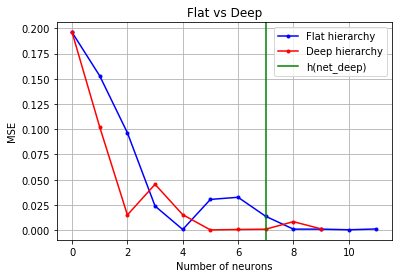

In [8]:
# Visualisierung der Daten
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(net_flat[1:], '.-b', label = 'Flat hierarchy')
ax.plot(net_deep[1:], '.-r', label = 'Deep hierarchy')
ax.axvline(x = 2*n + 1 , color = 'g' , label = 'h(net_deep)')

ax.set_ylabel('MSE')
ax.set_xlabel('Number of neurons')
ax.set_title('Flat vs Deep')
ax.legend();